In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [17]:
df = pd.read_csv("/Users/ivanm/Downloads/listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722


In [18]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.832100e+04,1.832100e+04,18321.000000,18321.000000,16056.000000,18321.000000,18321.000000,13952.000000,18321.000000,18321.000000,18321.000000
mean,3.370245e+17,1.723186e+08,41.391914,2.166945,126.494083,14.865892,43.864309,1.443145,33.812838,171.187381,11.819933
std,4.184948e+17,1.766263e+08,0.014042,0.017454,548.481873,31.514680,89.887244,1.894793,66.230543,136.551292,23.855482
min,1.747500e+04,3.073000e+03,41.352720,2.085593,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.239606e+07,1.023157e+07,41.381010,2.156690,50.000000,1.000000,1.000000,0.240000,1.000000,13.000000,0.000000
50%,4.638623e+07,1.038178e+08,41.389521,2.168030,87.000000,3.000000,7.000000,0.830000,5.000000,176.000000,2.000000
75%,8.064681e+17,3.289379e+08,41.401320,2.177490,130.000000,31.000000,44.000000,2.122500,29.000000,310.000000,15.000000
max,1.045480e+18,5.496387e+08,41.459560,2.227710,56815.000000,1124.000000,1941.000000,67.300000,318.000000,365.000000,1065.000000


In [19]:
df["stars"] = df["name"].apply(lambda x: x.split("★")[1].split("·")[0] if "★" in x else np.nan)
df["type"] = df["name"].apply(lambda x: x.split(" ")[0])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,stars,type
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,Eixample,la Dreta de l'Eixample,41.399390,2.170440,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN,4.40,Rental
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062,4.33,Rental
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.214870,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926,4.69,Rental
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057,4.77,Rental
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722,4.48,Rental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,Rental unit in Barcelona · ★New · 2 bedrooms ·...,3556337,Alejandro,Eixample,l'Antiga Esquerra de l'Eixample,41.388694,2.162324,Entire home/apt,143.0,1,0,NaN,NaN,51,364,0,HUTB-007296,New,Rental
18317,1042044489456901435,Rental unit in Barcelona · ★New · 3 bedrooms ·...,93833963,Maria,Horta-Guinardó,el Guinardó,41.422690,2.176110,Private room,96.0,32,0,NaN,NaN,6,268,0,Exempt,New,Rental
18318,1042051147106602685,Rental unit in Barcelona · ★New · 2 bedrooms ·...,66296022,Toni,Ciutat Vella,la Barceloneta,41.380426,2.191397,Entire home/apt,75.0,32,0,NaN,NaN,12,364,0,NaN,New,Rental
18319,1042053373256947884,Rental unit in Barcelona · ★New · 1 bedroom · ...,478007968,Morge,Eixample,la Sagrada Família,41.401691,2.176437,Private room,70.0,2,0,NaN,NaN,23,266,0,HUTB-784673,New,Rental


In [20]:
df.drop('last_review', axis=1, inplace=True)
df.drop('license', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('host_name', axis=1, inplace=True)


In [21]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stars,type
0,17475,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,0.16,1,32,9,4.40,Rental
1,18674,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,0.31,30,39,7,4.33,Rental
2,198958,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,0.74,9,137,26,4.69,Rental
3,23197,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,0.48,2,300,11,4.77,Rental
4,32711,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,0.66,3,297,16,4.48,Rental


In [22]:
df.isna().sum()

id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             2265
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4369
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
stars                             5962
type                                 0
dtype: int64

In [23]:
df.shape

(18321, 16)

In [24]:
m2 = df['reviews_per_month'].mean()

In [25]:
m = df['price'].mean()

In [26]:
df['stars'].fillna(0, inplace=True)

In [27]:
df['price'].fillna(m, inplace=True)

In [28]:
df['reviews_per_month'].fillna(m2, inplace=True)

<Axes: >

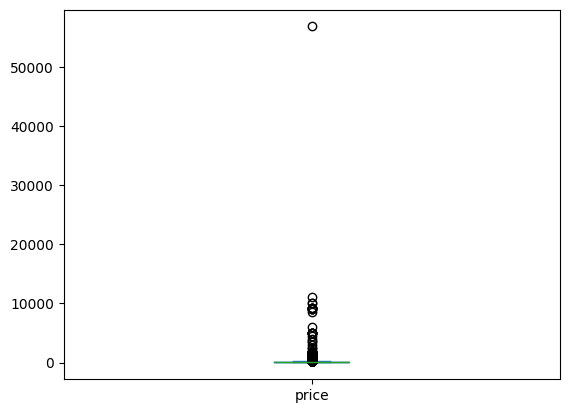

In [29]:
df['price'].plot(kind='box')

<Axes: >

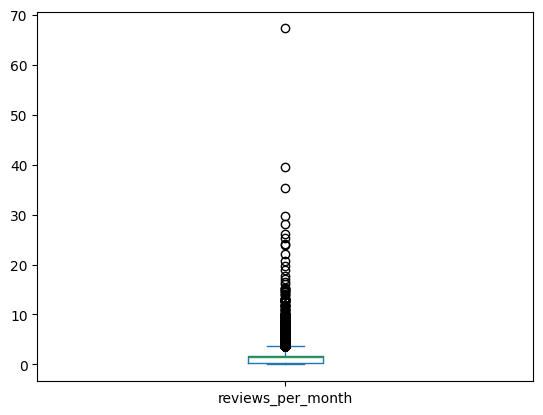

In [30]:
df['reviews_per_month'].plot(kind='box')

In [31]:
df.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
stars                              object
type                               object
dtype: object

In [32]:
encoded_df = df.copy()
encoded_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stars,type
0,17475,65623,Eixample,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,0.16,1,32,9,4.40,Rental
1,18674,71615,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,0.31,30,39,7,4.33,Rental
2,198958,971768,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,0.74,9,137,26,4.69,Rental
3,23197,90417,Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,0.48,2,300,11,4.77,Rental
4,32711,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,0.66,3,297,16,4.48,Rental


In [36]:
encoder = LabelEncoder()

encoded_df['neighbourhood_group'] = encoder.fit_transform(encoded_df['neighbourhood_group'])
encoded_df['neighbourhood'] = encoder.fit_transform(encoded_df['neighbourhood'])
encoded_df['room_type'] = encoder.fit_transform(encoded_df['room_type'])
encoded_df['type'] = encoder.fit_transform(encoded_df['type'])

encoded_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stars,type
0,17475,65623,1,49,41.399390,2.170440,0,140.0,5,26,0.160000,1,32,9,4.40,20
1,18674,71615,1,58,41.405560,2.172620,0,121.0,1,40,0.310000,30,39,7,4.33,20
2,198958,971768,7,3,41.408050,2.214870,0,304.0,2,105,0.740000,9,137,26,4.69,20
3,23197,90417,7,29,41.412432,2.219750,0,200.0,3,75,0.480000,2,300,11,4.77,20
4,32711,135703,2,31,41.405660,2.170150,0,79.0,1,99,0.660000,3,297,16,4.48,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,3556337,1,45,41.388694,2.162324,0,143.0,1,0,1.443145,51,364,0,New,20
18317,1042044489456901435,93833963,3,38,41.422690,2.176110,2,96.0,32,0,1.443145,6,268,0,New,20
18318,1042051147106602685,66296022,0,46,41.380426,2.191397,0,75.0,32,0,1.443145,12,364,0,New,20
18319,1042053373256947884,478007968,1,58,41.401691,2.176437,2,70.0,2,0,1.443145,23,266,0,New,20


In [53]:
encoded_df['stars'] = encoded_df['stars'].replace('New ', 0)
encoded_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stars,type
0,17475,65623,1,49,41.399390,2.170440,0,140.0,5,26,0.160000,1,32,9,4.40,20
1,18674,71615,1,58,41.405560,2.172620,0,121.0,1,40,0.310000,30,39,7,4.33,20
2,198958,971768,7,3,41.408050,2.214870,0,304.0,2,105,0.740000,9,137,26,4.69,20
3,23197,90417,7,29,41.412432,2.219750,0,200.0,3,75,0.480000,2,300,11,4.77,20
4,32711,135703,2,31,41.405660,2.170150,0,79.0,1,99,0.660000,3,297,16,4.48,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,3556337,1,45,41.388694,2.162324,0,143.0,1,0,1.443145,51,364,0,0,20
18317,1042044489456901435,93833963,3,38,41.422690,2.176110,2,96.0,32,0,1.443145,6,268,0,0,20
18318,1042051147106602685,66296022,0,46,41.380426,2.191397,0,75.0,32,0,1.443145,12,364,0,0,20
18319,1042053373256947884,478007968,1,58,41.401691,2.176437,2,70.0,2,0,1.443145,23,266,0,0,20


In [55]:
encoded_df['stars'].unique()

array(['4.40 ', '4.33 ', '4.69 ', '4.77 ', '4.48 ', '4.80 ', '3.40 ',
       '4.71 ', '4.88 ', '4.53 ', '4.78 ', '4.66 ', '4.32 ', '4.81 ',
       '4.17 ', '4.60 ', '4.74 ', 0, '4.37 ', '4.23 ', '4.15 ', '4.0 ',
       '4.84 ', '4.58 ', '4.19 ', '4.42 ', '4.52 ', '4.64 ', '4.70 ',
       '4.43 ', '4.79 ', '4.62 ', '4.86 ', '4.50 ', '4.55 ', '4.65 ',
       '4.25 ', '4.51 ', '4.93 ', '4.75 ', '4.82 ', '4.73 ', '4.41 ',
       '4.63 ', '4.94 ', '4.18 ', '4.67 ', '4.76 ', '4.56 ', '4.46 ',
       '4.39 ', '4.83 ', '4.89 ', '4.90 ', '4.38 ', '4.87 ', '4.91 ',
       '4.54 ', '4.96 ', '4.22 ', '4.59 ', '5.0 ', '4.57 ', '4.20 ',
       '4.45 ', '3.75 ', '3.57 ', '4.47 ', '4.97 ', '4.85 ', '4.29 ',
       '4.92 ', '4.31 ', '4.26 ', '4.49 ', '4.98 ', '4.01 ', '4.28 ',
       '4.68 ', '4.99 ', '4.61 ', '4.36 ', '4.21 ', '4.13 ', '4.35 ',
       '3.81 ', '4.44 ', '4.14 ', '4.95 ', '3.84 ', '4.16 ', '4.72 ',
       '3.83 ', '4.27 ', '3.87 ', '3.88 ', '4.07 ', '4.30 ', '4.34 ',
       '3.43 ', '4.

In [59]:
encoded_df['stars']=encoded_df['stars'].astype(float)
encoded_df.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                 int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                           int64
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
stars                             float64
type                                int64
dtype: object

<Axes: xlabel='longitude', ylabel='latitude'>

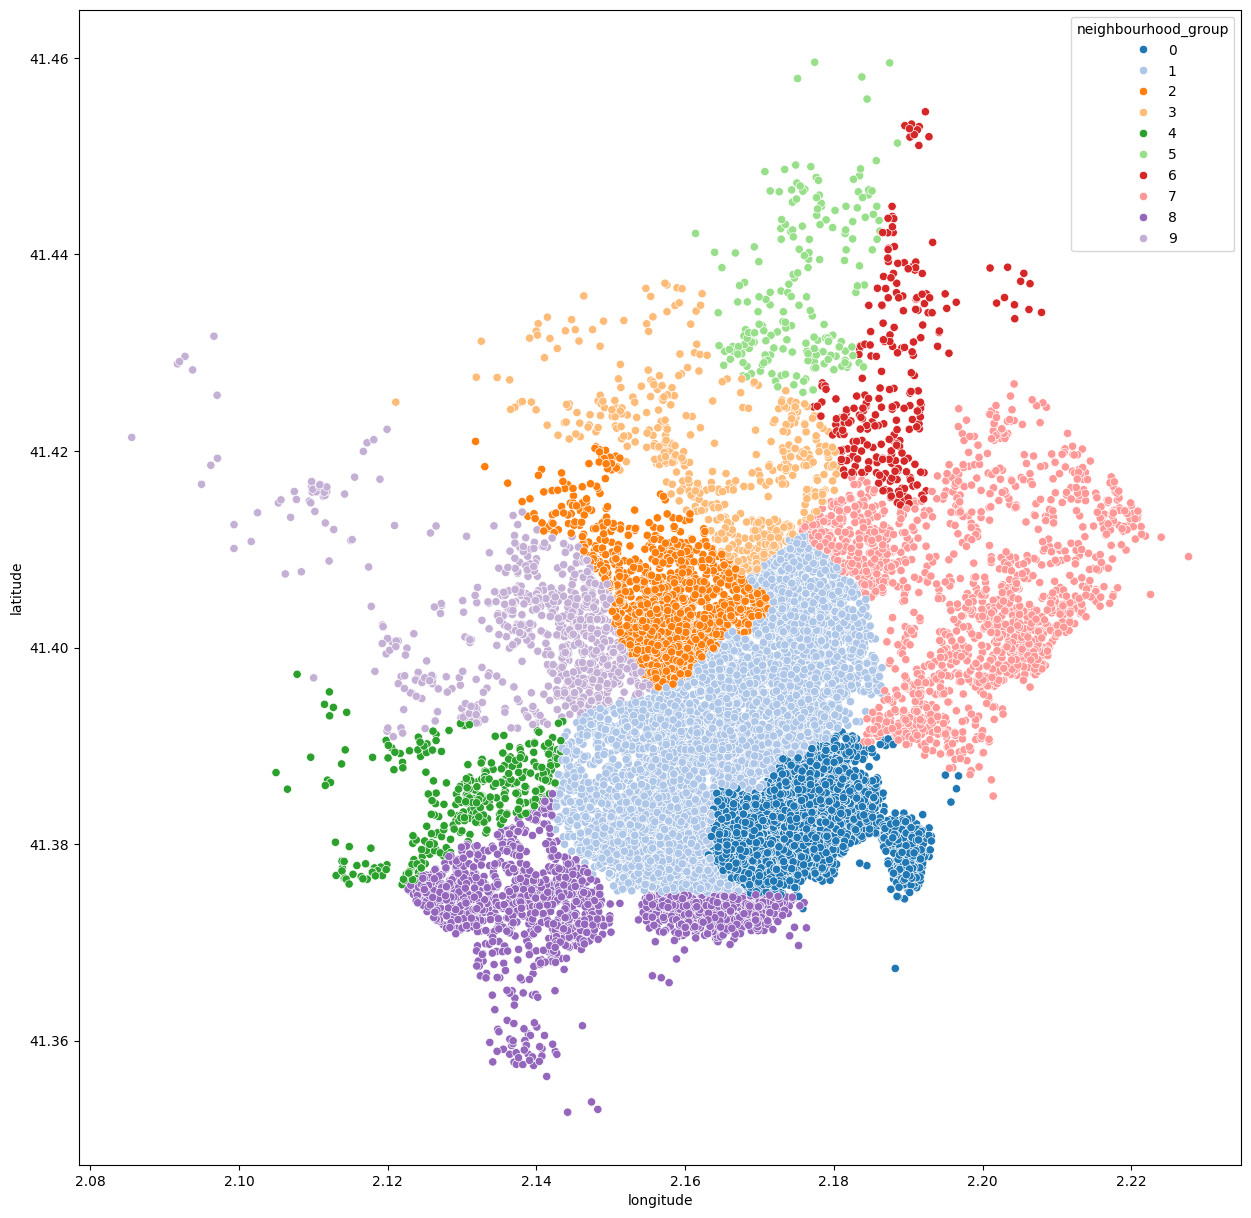

In [68]:

plt.figure(figsize=(15,15))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'neighbourhood_group', data = encoded_df, legend = 'full', palette = 'tab20')

In [123]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Cargar el DataFrame

# Seleccionar las columnas de interés
X = encoded_df[['latitude', 'longitude']]

# Escalar los datos si es necesario
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y ajustar el modelo DBSCAN
epsilon = 0.25 # Puedes ajustar este valor según la densidad de tus datos
min_samples = 1  # Puedes ajustar este valor según tus necesidades
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X_scaled)

# Agregar las etiquetas de los clusters al DataFrame
encoded_df['cluster'] = dbscan.labels_
encoded_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stars,type,cluster
0,17475,65623,1,49,41.399390,2.170440,0,140.0,5,26,0.160000,1,32,9,4.40,20,0
1,18674,71615,1,58,41.405560,2.172620,0,121.0,1,40,0.310000,30,39,7,4.33,20,0
2,198958,971768,7,3,41.408050,2.214870,0,304.0,2,105,0.740000,9,137,26,4.69,20,0
3,23197,90417,7,29,41.412432,2.219750,0,200.0,3,75,0.480000,2,300,11,4.77,20,0
4,32711,135703,2,31,41.405660,2.170150,0,79.0,1,99,0.660000,3,297,16,4.48,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,1042002618810922779,3556337,1,45,41.388694,2.162324,0,143.0,1,0,1.443145,51,364,0,0.00,20,0
18317,1042044489456901435,93833963,3,38,41.422690,2.176110,2,96.0,32,0,1.443145,6,268,0,0.00,20,0
18318,1042051147106602685,66296022,0,46,41.380426,2.191397,0,75.0,32,0,1.443145,12,364,0,0.00,20,0
18319,1042053373256947884,478007968,1,58,41.401691,2.176437,2,70.0,2,0,1.443145,23,266,0,0.00,20,0


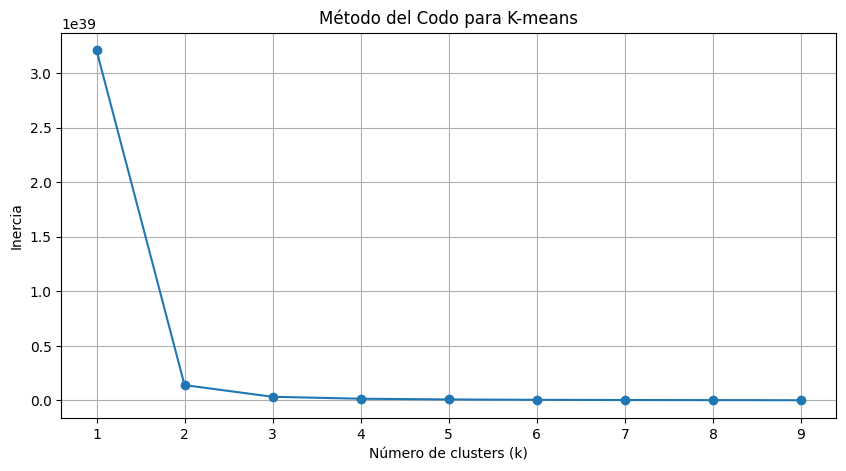

In [124]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

X = encoded_df.values
inercia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters= i, random_state= 32)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,10), inercia, marker= "o")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(np.arange(1, 10, 1))
plt.grid()

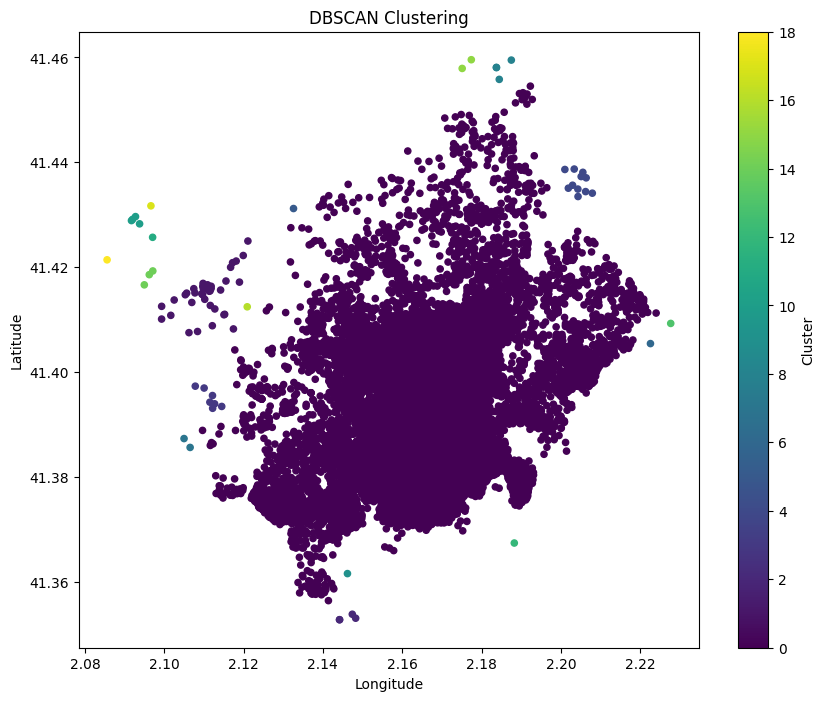

In [125]:
plt.figure(figsize=(10, 8))
plt.scatter(encoded_df['longitude'], encoded_df['latitude'], c=encoded_df['cluster'], cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()